Found 1617 images belonging to 2 classes.
Found 403 images belonging to 2 classes.
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 528ms/step - accuracy: 0.6371 - loss: 0.7963 - val_accuracy: 0.7965 - val_loss: 0.4608
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 509ms/step - accuracy: 0.8177 - loss: 0.4194 - val_accuracy: 0.8313 - val_loss: 0.4147
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 550ms/step - accuracy: 0.8807 - loss: 0.2992 - val_accuracy: 0.8462 - val_loss: 0.4112
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 525ms/step - accuracy: 0.9174 - loss: 0.2079 - val_accuracy: 0.8759 - val_loss: 0.3034
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 527ms/step - accuracy: 0.9290 - loss: 0.1654 - val_accuracy: 0.8586 - val_loss: 0.4475
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 509ms/step - accuracy: 0.9524 - loss: 0.1245 - val_accuracy: 0.8883 - val_loss: 0.3098
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 532ms/step - accuracy: 0.9756 - loss: 0.0835 - val_accuracy: 0.8784 - val_loss: 0.4098
Epoch 8/10
51/

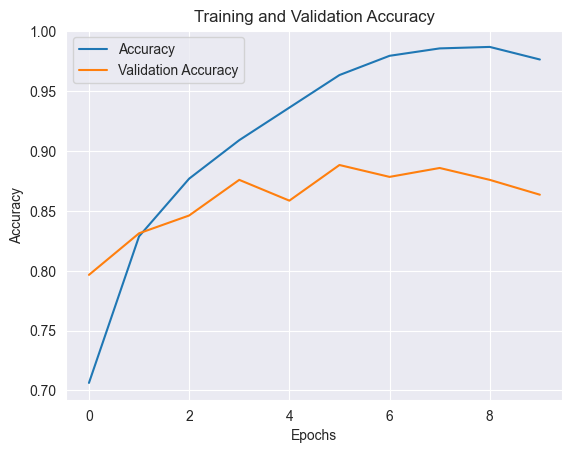

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Шлях до підкаталогів з класами
train_dir = r"D:\Learning\Інтелектуальний аналіз даних\Data_Science\DataSet\archive\train"
target_classes = ['tulip', 'rose']  # Обрані класи

# Нормалізація даних
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% даних для валідації
)

# Генерація даних для навчання (лише обрані класи)
train_data = data_gen.flow_from_directory(
    train_dir,
    classes=target_classes,  # Завантажуються лише "tulip" і "rose"
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Генерація даних для валідації
val_data = data_gen.flow_from_directory(
    train_dir,
    classes=target_classes,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Архітектура моделі
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Вихідний шар для двокласової класифікації
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

# Візуалізація результатів
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Збереження моделі
model.save('flower_classification_model_tulip_rose.h5')
